In [1]:
%pylab inline
import numpy as np
import os
import matplotlib.pyplot as plt
from cycler import cycler #For color cycles
import glob



#Trying to work out a safety for natsort
from types import ModuleType
from natsort import natsort as ns
if isinstance(ns, ModuleType):
    natsort = ns.natsorted
else:
    nasort = ns

Populating the interactive namespace from numpy and matplotlib


In [2]:
#!pip install glob2

In [3]:
#!pip show scipy
#!pip show numpy

## Resolution test

In [4]:
#Remember we're in Docker.
!pwd

/Users/dansandiford/Documents/programming/uwprojects/2dthermalslabs/kaplan/Analysis


In [5]:
import glob2

In [6]:
#rdir = '/workspace'
rdir = '../../..'
dat_files = natsort(glob2.glob(rdir + '/temp_results/results/R/**/*.dat'))
dat_files

['../../../temp_results/results/R/0/results_modelR_0.dat',
 '../../../temp_results/results/R/1/results_modelR_1.dat',
 '../../../temp_results/results/R/2/results_modelR_2.dat',
 '../../../temp_results/results/R/3/results_modelR_3.dat',
 '../../../temp_results/results/R/4/results_modelR_4.dat',
 '../../../temp_results/results/R/5/results_modelR_5.dat',
 '../../../temp_results/results/R/6/results_modelR_6.dat',
 '../../../temp_results/results/R/7/results_modelR_7.dat',
 '../../../temp_results/results/R/8/results_modelR_8.dat',
 '../../../temp_results/results/R/9/results_modelR_9.dat',
 '../../../temp_results/results/R/10/results_modelR_10.dat',
 '../../../temp_results/results/R/11/results_modelR_11.dat',
 '../../../temp_results/results/R/12/results_modelR_12.dat',
 '../../../temp_results/results/R/13/results_modelR_13.dat',
 '../../../temp_results/results/R/14/results_modelR_14.dat']

In [22]:
T = np.genfromtxt(dat_files[0], skip_header=0)

In [23]:
lstring = str(dat_files[0])
lstring.split('/')[-1]

'results_modelR_0.dat'

In [24]:
cmpy2 = 2.*1340000000000.0*3.168876464081849e-10
cmpy20 = 20.*1340000000000.0*3.168876464081849e-10

(0, 0.0002)

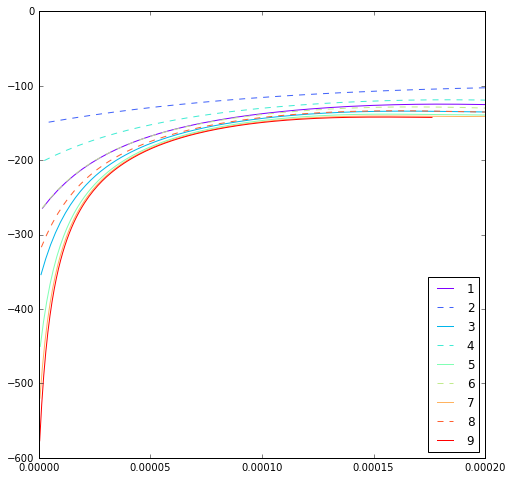

In [25]:
fig, axes = plt.subplots(figsize=(8,8))

color=iter(cm.rainbow(np.linspace(0,1,len(dat_files[1:10]))))

linestyle = '-'
counter = 0
for dat in dat_files[1:10]:
    if counter % 2 == 0:
        linestyle = '-'
    else:
        linestyle = '--'
    labelstring = str(dat).split('/')[-1].split('.')[0].split('_')[-1]
    D = np.genfromtxt(dat, skip_header=0, skip_footer=291-273)
    c=next(color)
    plt.plot(D[:,-1], D[:,23],c=c, linestyle = linestyle, label=labelstring)
    counter +=1

#plt.plot(T[:,0], T[:,8], 'k--', label='T0')

#axes.set_yscale("log")
#axes.axhline(y=cmpy2, c = 'r', linestyle=':',  label = '2 cm/y')
#axes.axhline(y=cmpy20, linestyle=':', label  = '20 cm/y')
axes.legend(loc=4)
axes.set_xlim(0, 0.0002)

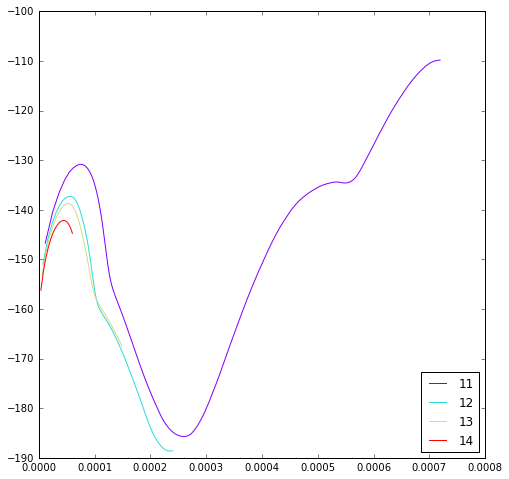

In [103]:
fig, axes = plt.subplots(figsize=(8,8))

color=iter(cm.rainbow(np.linspace(0,1,len(dat_files[-4:]))))

linestyle = '-'
counter = 0
for dat in dat_files[-4:]:


    labelstring = str(dat).split('/')[-1].split('.')[0].split('_')[-1]
    D = np.genfromtxt(dat, skip_header=0, skip_footer=291-273)
    c=next(color)
    plt.plot(D[:,-1], D[:,-5],c=c, linestyle = linestyle, label=labelstring)
    counter +=1

#plt.plot(T[:,0], T[:,8], 'k--', label='T0')

#axes.set_yscale("log")
#axes.axhline(y=cmpy2, c = 'r', linestyle=':',  label = '2 cm/y')
#axes.axhline(y=cmpy20, linestyle=':', label  = '20 cm/y')
axes.legend(loc=4)
#axes.set_xlim(0, 0.0002)

## A

In [30]:
#rdir = '/workspace'
rdir = '../../..'
dat_files = natsort(glob2.glob(rdir + '/temp_results/results/A/**/*.dat'))

```
for a in 0.2 1.0 2.0
do
   for b in 0.5 1.0 2.0 4.0
   do
      for c in 0.5 1.0 2.0
      do
         for d in 0.1 1.0 10.0
         do 
            qsub -v COUNTER=$counter,A=$a,B=$b,C=$c,D=$d array.pbs
            let counter=counter+1
         done
      done
   done
done
```

In [31]:
cohesion_list= []
fc_list=[] 
eta_list= []
E_list= []
for c in range(len((0.2, 1.0,2.0))):
    for fc in range(len((0.5, 1.0, 2.0, 4.0))):
        for e in range(len((0.5, 1.0, 2.0))):
            for E in range(len((0.1, 1.0, 1.0))):
                cohesion_list.append(c)
                fc_list.append(fc) 
                eta_list.append(e)
                E_list.append(E)

                
                

In [32]:
np.unique(E_list)

array([0, 1, 2])

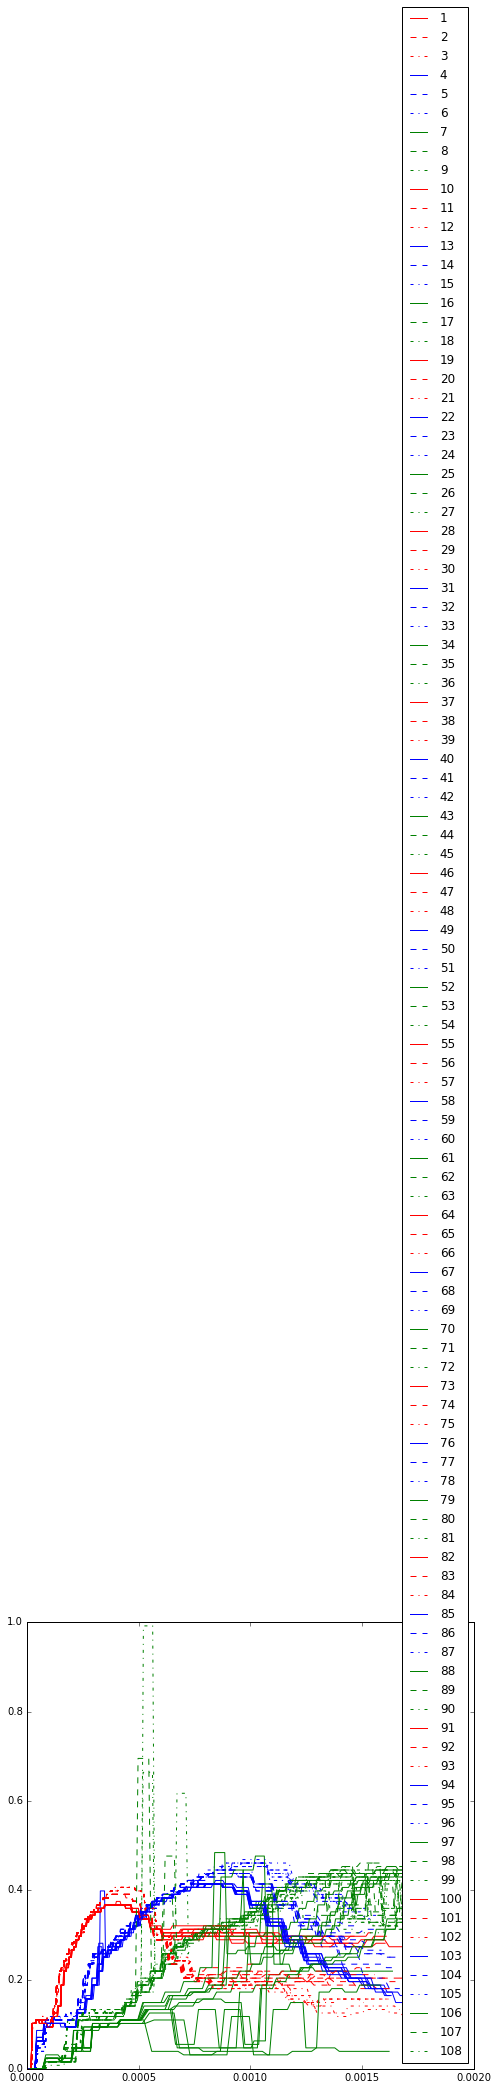

In [33]:
fig, axes = plt.subplots(figsize=(8,8))

#color=iter(cm.rainbow(np.linspace(0,1,len(dat_files[1:]))))

linestyle = '-'
counter = 1
for i in range(len(dat_files[1:])):
    if E_list[i] == 0:
        linestyle = '-'
    elif E_list[i] == 1:
        linestyle = '--'
    elif E_list[i] == 2:
        linestyle = '-.'
    else: 
        linestyle = ':'
        
    if eta_list[i] == 0:
        c = 'r'
    elif eta_list[i] == 1:
        c = 'b'
    else:
        c = 'g'
    #else:
    #    linestyle = '--'
    labelstring = str(dat_files[counter]).split('/')[-1].split('.')[0].split('_')[-1]
    D = np.genfromtxt(dat_files[counter], skip_header=0, skip_footer=291-273)
    #c=next(color)
    plt.plot(D[:,-1], D[:,-2],c=c, linestyle = linestyle, label=labelstring)
    counter +=1

#plt.plot(T[:,0], T[:,8], 'k--', label='T0')

#axes.set_yscale("log")
#axes.axhline(y=cmpy2, c = 'r', linestyle=':',  label = '2 cm/y')
#axes.axhline(y=cmpy20, linestyle=':', label  = '20 cm/y')
axes.legend(loc=4)
#axes.set_xlim(0, 0.0002)

## B

## Scratch

In [7]:
#rdir = '/workspace'
#rdir = '../../../temp_results/results_modelT_5_Base.dat'
T5 = np.genfromtxt('../../../temp_results/results_modelT_5_Base.dat', skip_header=0)
T9 = np.genfromtxt('../../../temp_results/results_modelT_9_Base.dat', skip_header=0)
T12 = np.genfromtxt('../../../temp_results/results_modelT_12_Base.dat', skip_header=0)
T13 = np.genfromtxt('../../../temp_results/results_modelT_13_Base.dat', skip_header=0)
T14 = np.genfromtxt('../../../temp_results/results_modelT_14.dat', skip_header=0)

In [4]:
T5.shape, T9.shape, T12.shape 

((154, 17), (94, 17), (46, 17))

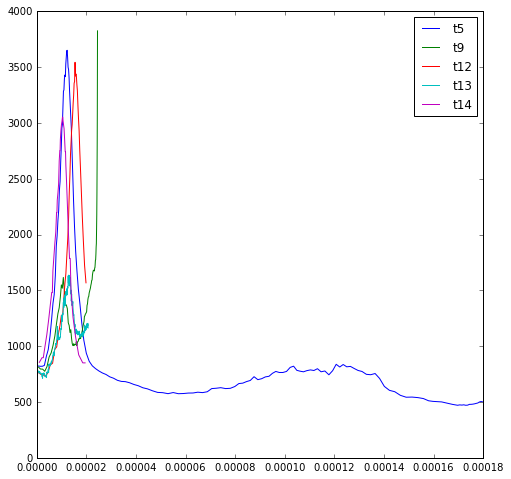

In [19]:
fig, axes = plt.subplots(figsize=(8,8))

axes.plot(T5[:,0], T5[:,7], label='t5')
axes.plot(T9[:,0], T9[:,7],label='t9')
axes.plot(T12[:,0], T12[:,7], label='t12')
axes.plot(T13[:,0], T13[:,7], label='t13')
axes.plot(T14[:,-1], T14[:,2], label='t14')

axes.legend()

In [12]:
#rdir = '/workspace'
#rdir = '../../../temp_results/results_modelT_5_Base.dat'
T0 = np.genfromtxt('../../garel/results/T/0/Base/results_modelT_0_Base.dat', skip_header=0)
T1 = np.genfromtxt('../../garel/results/T/1/Base/results_modelT_1_Base.dat', skip_header=0)

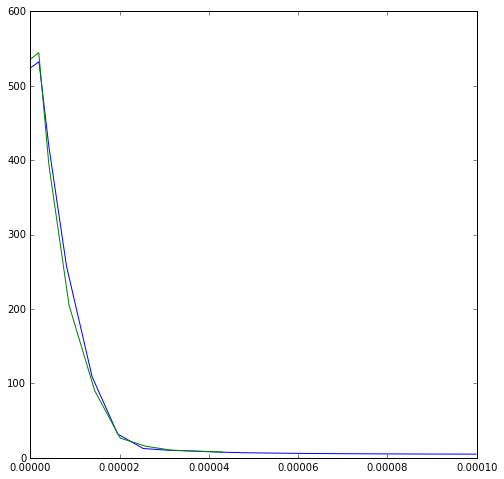

In [13]:
fig, axes = plt.subplots(figsize=(8,8))

axes.plot(T0[:,0], T0[:,8], label='t0')
axes.plot(T1[:,0], T1[:,8], label='t0')